# Task 1

In [88]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
# Read the Excel file "QVI_transaction_data.xlsx" into a DataFrame and assign it to df_1
df_1 = pd.read_excel("QVI_transaction_data.xlsx")

# Read the CSV file "QVI_purchase_behaviour.csv" into a DataFrame and assign it to df_2
df_2 = pd.read_csv("QVI_purchase_behaviour.csv")

Must always make a copy of your initial dataset because when you start manipulating the DataFrame, the changes you make will be applied to the original dataset.

Using a copy is playing on the safe side, making sure the initial DataFrame won't be modified.

In [10]:
transaction = df_1.copy()
purchase = df_2.copy()

We need to make sure that the type for both files has been imported as DataFrame

In [11]:
type(transaction)

pandas.core.frame.DataFrame

In [12]:
type(purchase)

pandas.core.frame.DataFrame

In [13]:
# Opening the transaction file
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [14]:
# Opening the purchase file
purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


## Transaction

In [15]:
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [22]:
# Checking total number of null for each column
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Looking at the types from transaction.info(), all 8 columns don't have empty cells or NAN. Each row has 264836 cells filled.

As can be seen, DATE is given an integer (int64). It should be in date format (datetime(64)).

In [23]:
# Convert the "DATE" column from integer to datetime format
# CSV and Excel integer dates begin on December 30th, 1899
transaction["DATE"] = pd.to_datetime(transaction["DATE"], origin = "1899-12-30", unit = "D")

In [24]:
# Let's see if the date has been updated
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


The dates has been fixed. STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_QTY, TOT_SALES data looks fine. For PROD_NAME, we want to make sure they are all chips.

In [26]:
# Checking information for "PROD_NAME" column
transaction["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [27]:
# Check the counts for each chips in PROD_NAME
transaction_data_counts = transaction['PROD_NAME'].value_counts()
transaction_data_counts

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [29]:
# Examine the words in PROD_NAME to see if there are any incorrect entries
# such as products that are not chips
product_words = pd.Series(transaction['PROD_NAME'].unique()).str.split(expand=True).stack()
product_words = product_words.to_frame(name='words').reset_index(drop=True)

# Removing digits
# It selects rows where the 'words' column does not contain digits.
# product_words = product_words[~product_words['words'].str.contains(r'\d')]

# Removing special characters
# It selects rows where the 'words' column only contains letters in a word.
product_words = product_words[product_words['words'].str.match(r'^\w+$')]

# Let's look at the most common words by counting the number of times a word appears
# and sorting them by this frequency in order of highest to lowest frequency
product_word_counts = product_words['words'].value_counts().reset_index()
product_word_counts.columns = ['words', 'count']
product_word_counts = product_word_counts.sort_values(by='count', ascending=False)

product_word_counts

,words,count
0,175g,26
1,Chips,21
2,150g,19
3,Smiths,16
4,Crinkle,14
...,...,...
116,Vingar,1
115,Veg,1
114,Strws,1
113,Mango,1


We are removing the word "salsa" as it doesn't categorise as chips, and all the word in the cell that has the word "salsa" doesn't have "chips" or anything. It is just a dip.

In [36]:
# Removing salsa
# str.contains('salsa', case = False) means string that contains 'salsa', and case = False means 
# the search is case sensitive.
transaction = transaction[~transaction['PROD_NAME'].str.contains('salsa', case = False)]

# Reset the index after filtering
# Basically, the line above is basically removing rows that has 'salsa' in the PROD_NAME column
# but the index has not been updated.
transaction.reset_index(drop = True, inplace = True)

# To run it, uncomment the next line:
# transaction['PROD_NAME']

In [37]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


As can be seen in the table, the max for PROD_QTY = 200 is concerning considering the PROD_QTY mean, std, and percentile is very close to the minimum. This goes for the same for TOT_SALES. The max for TOT_SALES = 650 is concerning considering the mean is around 7 and the 75th percentile is 8.8 which is nowhere near 650.

In [39]:
transaction['PROD_QTY'].describe()

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [40]:
transaction['TOT_SALES'].describe()

count    246742.000000
mean          7.321322
std           3.077828
min           1.700000
25%           5.800000
50%           7.400000
75%           8.800000
max         650.000000
Name: TOT_SALES, dtype: float64

In [41]:
# Considering all the stats for PROD_QTY are between 1 and 2 for average and percentile
# we will check if theres any quantity above 5.
# It is more for outlier check and 5 is a good number in this case.
transaction[transaction['PROD_QTY'] > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [42]:
# Considering all the stats for TOT_SALES are between 1 and 8 for average and percentile
# we will check if theres any quantity above 30.
# It is more for outlier check and 5 is a good number in this case.
transaction[transaction['TOT_SALES'] > 30]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove these from further analysis. We can see that it is the same 2 customer that had total sales of 650 with PROD_QTY of 200.
That does add up but there were no outliers from both PROD_QTY and TOT_SALES. We will remove them.


In [46]:
# Removing 200 from PROD_QTY as it is an outlier
# str.contains('salsa', case = False) means string that contains 'salsa', and case = False means 
# the search is case sensitive.
transaction = transaction[~transaction['PROD_QTY'].astype(str).str.contains('200', case = False)]

# Reset the index after filtering
# Basically, the line above is basically removing rows that has 200 in the PROD_QTY column
# but the index has not been updated.
transaction.reset_index(drop = True, inplace = True)


In [52]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


You can see that the count went from 246742 to 246740. Now, let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data.


In [50]:
# Group by 'DATE' and count the number of transactions
# groupby('DATE') groups the DataFrame by the 'DATE' column.
# size() counts the number of rows in each group.
# reset_index(name='Transaction_Count') resets the index of the resulting DataFrame and renames the count column to 'Transaction_Count'.
transaction_counts = transaction.groupby('DATE').size().reset_index(name='Transaction_Count')

# Display the transaction counts by date
transaction_counts

,DATE,Transaction_Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.


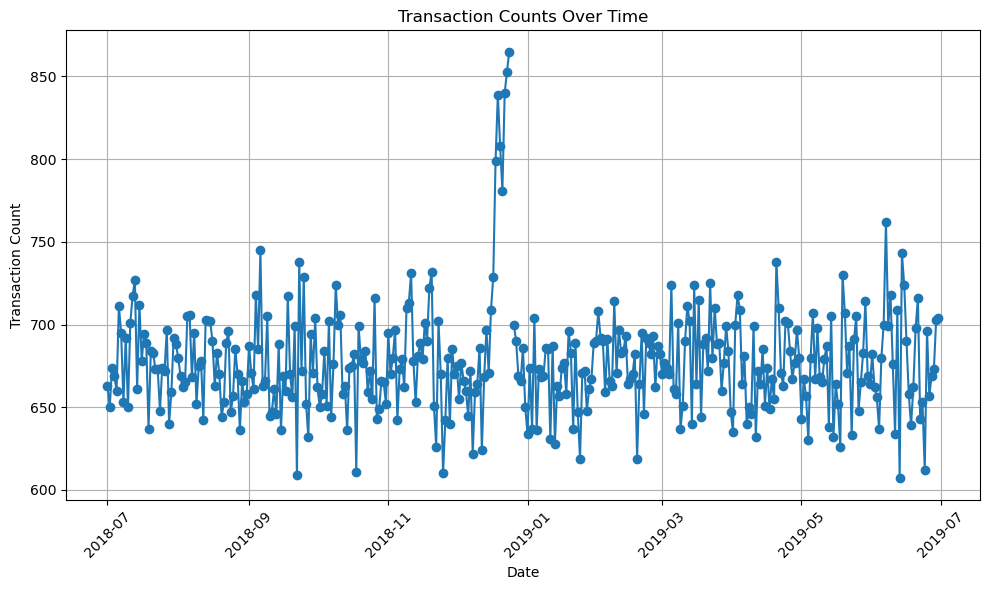

In [65]:
# Generate a DataFrame with the complete date range
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
complete_dates = pd.DataFrame({'DATE': date_range})


# Merge the complete date DataFrame with your dataset
merged_data = pd.merge(complete_dates, transaction_counts, on='DATE', how='left')

# Plot the transaction counts over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['DATE'], merged_data['Transaction_Count'], marker='o', linestyle='-')
plt.title('Transaction Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that there is an increase in purchases in December and a break in late
December. Let's zoom in on this.


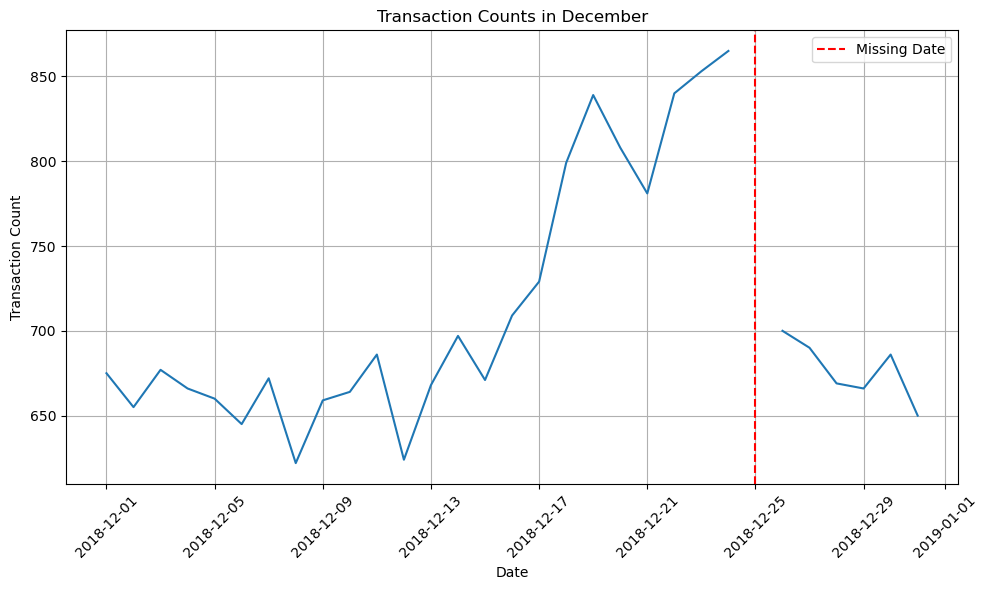

Missing Date: 2018-12-25 00:00:00


In [58]:
# Filter the data to include only the month of December
december_data = merged_data[(merged_data['DATE'].dt.month == 12)]

# Find the missing date
missing_date = merged_data[merged_data.isnull().any(axis=1)]['DATE'].iloc[0]

# Plot the transaction counts for December
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['Transaction_Count'], linestyle='-')
plt.title('Transaction Counts in December')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.axvline(x=missing_date, color='red', linestyle='--', label='Missing Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the missing date
print("Missing Date:", missing_date)

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.

In [66]:
# Extract digits from 'PROD_NAME' column and assign to 'PACK_SIZE'
# Use the 'str.extract()' method to extract digits from each string in the 'PROD_NAME' column
# Convert the extracted digits to floating-point numbers and assign them to the 'PACK_SIZE' column
transaction['PACK_SIZE'] = transaction['PROD_NAME'].str.extract('(\d+)').astype(float)

# Always check your output
# Let's check if the pack sizes look sensible
pack_size_counts = transaction.groupby('PACK_SIZE').size().reset_index(name='Count')
pack_size_counts = pack_size_counts.sort_values(by='PACK_SIZE')

pack_size_counts

,PACK_SIZE,Count
0,70.0,1507
1,90.0,3008
2,110.0,22387
3,125.0,1454
4,134.0,25102
5,135.0,3257
6,150.0,40203
7,160.0,2970
8,165.0,15297
9,170.0,19983


The largest size is 380g and the smallest size is 70g - seems sensible!


In [70]:
# Lets check the output of the rows shown here to see if we have picked out pack size and there is no different data.
# It is enough data to check from here.
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0
...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0


Let's plot a histogram of PACK_SIZE since we know that it is a categorical
variable and not a continuous variable even though it is numeric.


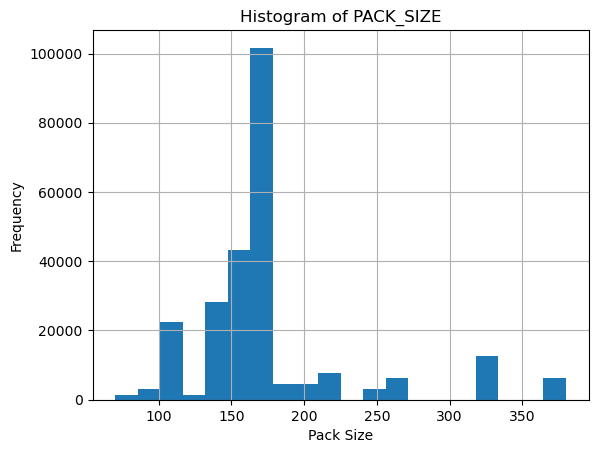

In [79]:
# Adjust the number of bins as needed
plt.hist(transaction['PACK_SIZE'], bins= 20) 
plt.title('Histogram of PACK_SIZE')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Pack sizes created look reasonable.
Now to create brands, we can use the first word in PROD_NAME to work out the brand
name...


In [80]:
# Convert the first word in PROD_NAME to uppercase and assign it to the BRAND column
transaction['BRAND'] = transaction['PROD_NAME'].str.split().str[0].str.upper()

# Checking brands and counting occurrences
brand_counts = transaction['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'Count']
brand_counts = brand_counts.sort_values(by='Count', ascending=False)

brand_counts

,BRAND,Count
0,KETTLE,41288
1,SMITHS,27390
2,PRINGLES,25102
3,DORITOS,22041
4,THINS,14075
5,RRD,11894
6,INFUZIONS,11057
7,WW,10320
8,COBS,9693
9,TOSTITOS,9471


Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.

In [82]:
# Clean brand names
transaction.loc[transaction['BRAND'] == "RED", 'BRAND'] = "RRD"
transaction.loc[transaction['BRAND'] == "SNBTS", 'BRAND'] = "SUNBITES"
transaction.loc[transaction['BRAND'] == "INFZNS", 'BRAND'] = "INFUZIONS"
transaction.loc[transaction['BRAND'] == "WW", 'BRAND'] = "WOOLWORTHS"
transaction.loc[transaction['BRAND'] == "SMITH", 'BRAND'] = "SMITHS"
transaction.loc[transaction['BRAND'] == "NCC", 'BRAND'] = "NATURAL"
transaction.loc[transaction['BRAND'] == "DORITO", 'BRAND'] = "DORITOS"
transaction.loc[transaction['BRAND'] == "GRAIN", 'BRAND'] = "GRNWVES"

# Checking brands and counting occurrences
brand_counts = transaction['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'Count']
brand_counts = brand_counts.sort_values(by='BRAND')

brand_counts

,BRAND,Count
18,BURGER,1564
15,CCS,4551
17,CHEETOS,2927
14,CHEEZELS,4603
8,COBS,9693
2,DORITOS,25224
19,FRENCH,1418
11,GRNWVES,7740
5,INFUZIONS,14201
0,KETTLE,41288


Text(0.5, 0, 'Transaction')

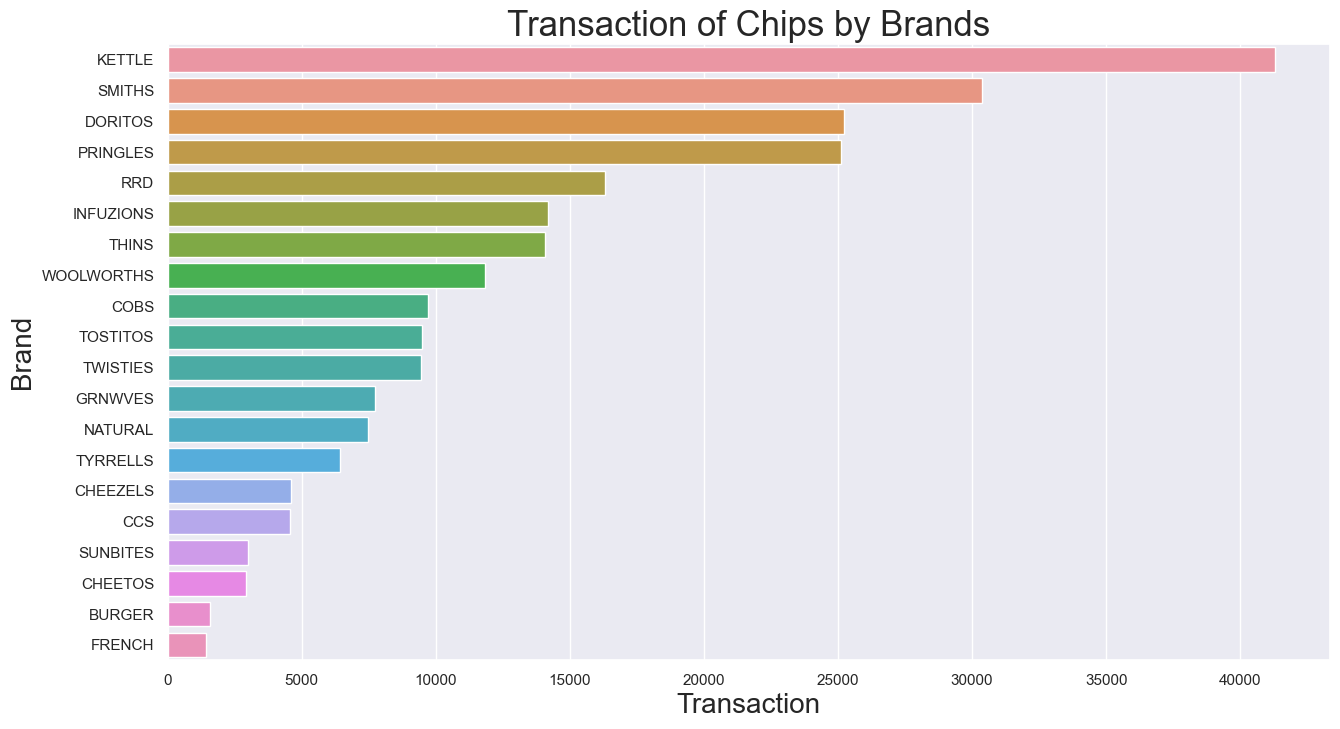

In [101]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize = (15,8))
sns.barplot(x = transaction["BRAND"].value_counts(), y = transaction["BRAND"].value_counts().index)
plt.title("Transaction of Chips by Brands",fontsize = 25)
plt.ylabel("Brand", fontsize = 20)
plt.xlabel("Transaction", fontsize = 20)

Kettle is the most popular brand followed by Smiths.

## Purchase

In [103]:
purchase.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [105]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [107]:
# Checking total number of null for each column
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [135]:
# Lets see if the Loyalty card numbers are all unique
purchase['LYLTY_CARD_NBR'].nunique()

72637

The total number of rows is 72637 and we have checked the number of unique numbers for Loyalty card number, and it matches! There are no loyalty card number who has the same values.

Looking at the types from purchase.info(), all 3 columns don't have empty cells or NAN. Each row has 72637 cells filled.

Looks pretty clean already!

In [108]:
purchase.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


I mean... not much information from that... forgot that object type doesnt show up on .describe(). Let's check LIFESTAGE and PREMIUM_CUSTOMER columns.

In [109]:
purchase.describe(include = 'all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


Looks better to see it like this way at least.

In [112]:
# Examining the values of LIFESTAGE
lifestage_counts = purchase['LIFESTAGE'].value_counts().reset_index().sort_values(by='LIFESTAGE', ascending=False)
lifestage_counts.columns = ['LIFESTAGE', 'Count']
print(lifestage_counts)

                LIFESTAGE  Count
0                RETIREES  14805
1   OLDER SINGLES/COUPLES  14609
2   YOUNG SINGLES/COUPLES  14441
3          OLDER FAMILIES   9780
4          YOUNG FAMILIES   9178
5  MIDAGE SINGLES/COUPLES   7275
6            NEW FAMILIES   2549


In [113]:
# Examining the values of PREMIUM_CUSTOMER
premium_customer_counts = purchase['PREMIUM_CUSTOMER'].value_counts().reset_index().sort_values(by='PREMIUM_CUSTOMER', ascending=False)
premium_customer_counts.columns = ['PREMIUM_CUSTOMER', 'Count']
print(premium_customer_counts)

  PREMIUM_CUSTOMER  Count
0       Mainstream  29245
1           Budget  24470
2          Premium  18922


There doesn't seem to be any mistakes in both LIFESTAGE and PREMIUM_CUSTOMER. There's no spelling mistakes or abbreviation or anything like that. Let's draw up a histogram.

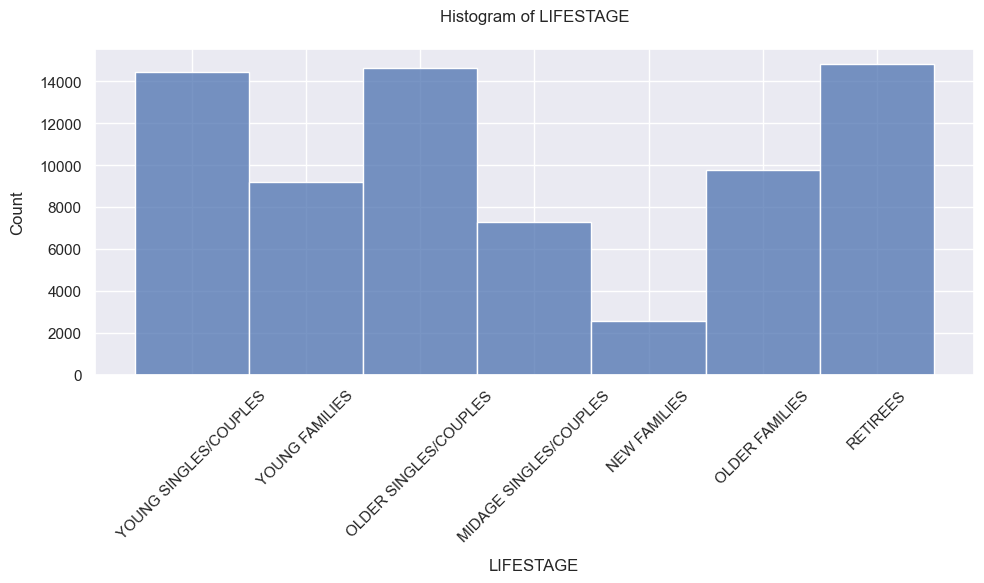

In [131]:
# Set up the figure and axes with only one row
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Plot histogram for LIFESTAGE
sns.histplot(data=purchase, x='LIFESTAGE', ax=axes)
axes.set_title('Histogram of LIFESTAGE', pad=20)  # Add space between title and graph
axes.set_xlabel('LIFESTAGE', labelpad=10)  # Add space between x-label and tick labels
axes.set_ylabel('Count', labelpad=10)  # Add space between y-label and tick labels
axes.tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

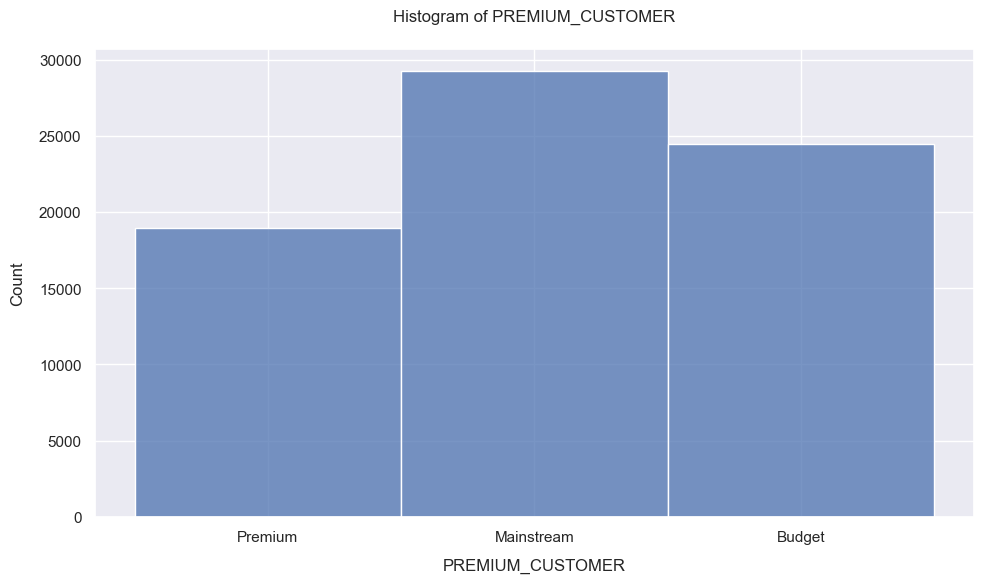

In [133]:
# Set up the figure and axes with only one row
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Plot histogram for PREMIUM_CUSTOMER
sns.histplot(data=purchase, x='PREMIUM_CUSTOMER', ax=axes)
axes.set_title('Histogram of PREMIUM_CUSTOMER', pad = 20)
axes.set_xlabel('PREMIUM_CUSTOMER', labelpad = 10)
axes.set_ylabel('Count', labelpad = 10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Merging the Two Datasets

In [143]:
# merged_df = pd.merge(df1, df2, on='LYLTY_CARD_NBR', how='inner')
# The how parameter in the merge() function determines how to handle the intersection of keys that are present in both DataFrames being merged. 
# 'inner': Use only the key combinations that are present in both DataFrames. This is the default behaviour.
merged_df = pd.merge(transaction, purchase, on = 'LYLTY_CARD_NBR', how = "inner")
merged_df

# Other ones are like:

# 'outer': Use all key combinations from both DataFrames. This is similar to taking the union of the keys.

# 'left': Use all key combinations from the left DataFrame and only those from the right DataFrame that have a matching key in the left DataFrame.

# 'right': Use all key combinations from the right DataFrame and only those from the left DataFrame that have a matching key in the right DataFrame.

# 'cross': Create the Cartesian product of the two DataFrames. This will result in all possible combinations of rows from both DataFrames, regardless of whether there is a matching key.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,WOOLWORTHS,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,TOSTITOS,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITOS,YOUNG SINGLES/COUPLES,Premium


In [144]:
merged_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,WOOLWORTHS,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
8,2018-07-06,4,4149,3330,46,Kettle Original 175g,2,10.8,175.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget
9,2018-07-18,4,4149,3331,112,Tyrrells Crisps Ched & Chives 165g,2,8.4,165.0,TYRRELLS,MIDAGE SINGLES/COUPLES,Budget


In [142]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  float64       
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 24.5+ MB


In [146]:
# Checking total number of null for each column. There shouldn't be because we checked both 
# datasets but always best to check.
merged_df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

As can be seen in merged_df.info(), each columns has 246740 cells with no nulls. As the number of rows in `data` is the same as that of `transaction`, we can be
sure that no duplicates were created. 

Now we create a merged_df file.


In [147]:
merged_df.to_csv('QVI_Final_Data.csv')

#### Data exploration is now complete!


Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the
mix of customers who purchase chips
Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.